In [1]:
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg


     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=f15f42276928ad880aba10ac4156b8cd40b80f1764902efe8e739fe0ed8907a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-dvba8y7l/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


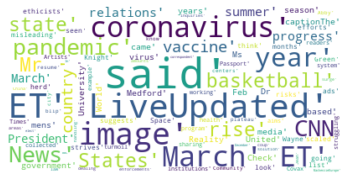

In [3]:
from newsapi import NewsApiClient
import en_core_web_sm
import pickle
import pandas as pd
from collections import Counter
import string

nlp_eng = en_core_web_sm.load()
newsapi = NewsApiClient (api_key='ab98a11433824b61a472a27c794b15df')

articles = []

for i in range(5):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-23', to='2021-03-23', sort_by='relevancy', page=i+1)
  articles.append(temp)

dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})


df = pd.DataFrame(dados)
df = df.dropna()
df.head()

def get_keywords_eng(content):
  doc = nlp_eng(content)
  result = []
  pos_tag = ("VERB", "NOUN", "PROPN")
  punctuation = string.punctuation
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  return result

results = []

for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

from wordcloud import WordCloud
import matplotlib.pyplot as plt 


df.to_excel('dataset.xlsx', index=False)

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()